In [128]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install sklearn
# %pip install -U scikit-learn
# %pip install spotipy

In [129]:
import pandas as pd

# Importing the dataset
dataset = pd.read_csv("data/tracks.csv")

# Creating the dataframe
df = pd.DataFrame(dataset)

df.tail()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.518,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.663,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.314,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4
586671,5Ocn6dZ3BJFPWh4ylwFXtn,Mar de Emociones,38,214360,0,['Afrosound'],['0i4Qda0k4nf7jnNHmSNpYv'],2015-07-01,0.686,0.723,6,-7.067,1,0.0363,0.105,0.000000,0.2640,0.9750,112.204,4


In [130]:
# Spotify API Authentication Information
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
#weilin's api key
client_id = '169bbab461424df7a16d00fbdb3201ec'
client_secret = '19fb464d5e34444aa5faa4613d35f6b6'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [131]:
df_fill_null = df.copy()

df_fill_null['name'] = df.apply(
    lambda row: sp.track(f"spotify:track:{row['id']}")['name'] if pd.isnull(row['name']) else row['name'], axis=1)
df_fill_null.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [132]:
df_fill_null.iloc[226336,1]

# Removing rows without song name.
df_removed = df.dropna()
df_removed.isnull().sum()
df_removed.count()
df_removed.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [133]:
df_removed['year'] = df_removed['release_date'].str.extract(r'(\d{4})').astype(int)
df_removed.head()

C:\Users\yukwa\AppData\Local\Temp\ipykernel_22964\123742635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_removed['year'] = df_removed['release_date'].str.extract(r'(\d{4})').astype(int)


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,1922


In [134]:
# Converting release_date feature to datetime format, and extracting the year.
# df_removed['release_date_datetime'] = pd.to_datetime(df_removed['release_date'], errors='coerce')
# df_removed["year"] = df_removed["release_date_datetime"].dt.year
# df_removed.head()

In [135]:
# Creating a new feature that comprises of Song Name and Artist.
df_removed["song_name_artist"] = df_removed["name"] + df_removed["artists"]
df_removed.head()

C:\Users\yukwa\AppData\Local\Temp\ipykernel_22964\3212663003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_removed["song_name_artist"] = df_removed["name"] + df_removed["artists"]


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,song_name_artist
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922,Carve['Uli']
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922,Capítulo 2.16 - Banquero Anarquista['Fernando ...
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922,Vivo para Quererte - Remasterizado['Ignacio Co...
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1922,El Prisionero - Remasterizado['Ignacio Corsini']
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,1922,Lady of the Evening['Dick Haymes']


In [136]:
# Removing all duplicate songs-artist pairs. Meaning that there won't be 2 of the same song sung by the same artist.
print(df_removed.shape)
df_removed.drop_duplicates(subset=["song_name_artist"], keep='first', inplace=True)
print(df_removed.shape)

(586601, 22)
(526609, 22)


C:\Users\yukwa\AppData\Local\Temp\ipykernel_22964\3753207886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_removed.drop_duplicates(subset=["song_name_artist"], keep='first', inplace=True)


In [137]:
# Filter data to keep songs published 2000* and later.
df_removed = df_removed[df_removed["year"] >= 2000]
print(df_removed.shape)

(187472, 22)


# Input your data here

In [138]:
# Using Spotify API to search for a song's information based on input and adding the necessary information in a DataFrame.
input = '我问天'

def search_track(track_name):
    # Search for the track
    results = sp.search(q=track_name, type='track')

    # Check if the track exists
    if results['tracks']['total'] > 0:
        # Get the first track from the results
        track = results['tracks']['items'][0]
        explicit = int(track["explicit"] == True)
        print(f'Found track: {track["name"]} by {track["artists"][0]["name"]} from the album {track["album"]["name"]}.')
        track_dict = {"id": track["id"], "name": track["name"], "popularity": track["popularity"], 
                      "duration_ms": track["duration_ms"], "explicit": explicit, "artists": track["artists"][0]["name"],
                      "id_artists": track["artists"][0]["id"], "release_date": track["album"]["release_date"]}
        return track_dict
    else:
        print('Track not found')
        return None

# Creating a Single Row DataFrame for the input song.
track_result = search_track(input)
td = pd.DataFrame(track_result, index=[0])
td

Found track: 我问天 (福建语) by Cai Ming Guo from the album 风是你雨是你.


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date
0,2mtiEsHhBc65q52WsmTHdo,我问天 (福建语),37,279928,0,Cai Ming Guo,1ZtntBgoG70o50IMnDRoWp,2007


In [139]:
# Obtaining Feature Data from song based on its song_id from previous function and adding them to a DataFrame.
def get_audio_features(track_result):
    song_id = track_result["id"]
    results = sp.audio_features(song_id)

    if results:
        return results[0]
    else:
        print(f'No audio features found for song ID: {song_id}')
        return None

audio_features = get_audio_features(track_result)
af = pd.DataFrame(audio_features, index=[0])
# Taking out the irrevelant features.
af_formatted = af.drop(["type", "id", "uri", "track_href", "analysis_url", "duration_ms"], axis=1)
# Merging both DataFrames to sync up with the dataset's layout.
td = pd.concat([td, af_formatted], axis=1)
td['year'] = td['release_date'].str.extract(r'(\d{4})').astype(int)

In [140]:
td

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,2mtiEsHhBc65q52WsmTHdo,我问天 (福建语),37,279928,0,Cai Ming Guo,1ZtntBgoG70o50IMnDRoWp,2007,0.476,0.739,...,-4.455,1,0.03,0.309,0.000002,0.206,0.367,137.96,4,2007


In [141]:
# Adding the Input Song to the Dataset DataFrame. Added to the very front.
new_df = pd.concat([td, df_removed], ignore_index=True)
new_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,song_name_artist
0,2mtiEsHhBc65q52WsmTHdo,我问天 (福建语),37,279928,0,Cai Ming Guo,1ZtntBgoG70o50IMnDRoWp,2007,0.476,0.739,...,1,0.0300,0.309,0.000002,0.206,0.367,137.960,4,2007,NaN
1,6catF1lDhNTjjGa2GxRQNN,You'll Never Walk Alone - Mono; 2002 Remaster,56,160187,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.484,0.265,...,1,0.0322,0.394,0.000000,0.149,0.285,113.564,3,2008,You'll Never Walk Alone - Mono; 2002 Remaster[...
2,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,...,1,0.0571,0.436,0.000000,0.139,0.839,120.689,4,2020,A Lover's Concerto['The Toys']
3,4aSw1QJIMwYSoDEgzgdCJL,Ferry Cross the Mersey - Mono; 2002 Remaster,40,141987,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.405,0.365,...,0,0.0289,0.255,0.000005,0.163,0.588,104.536,4,2008,Ferry Cross the Mersey - Mono; 2002 Remaster['...
4,0ZMMtH875IR2TfkyC4PolD,Don't Let the Sun Catch You Crying (Main) - Mono,34,157093,0,['Gerry & The Pacemakers'],['3UmBeGyNwr4iDWi1vTxWi8'],2008-02-11,0.477,0.352,...,1,0.0300,0.406,0.000000,0.122,0.478,106.773,4,2008,Don't Let the Sun Catch You Crying (Main) - Mo...


In [142]:
# Recalibrating the Index.
# new_df = new_df.reset_index(drop=True)
# new_df.head()

# Checking loudness values.
new_df["loudness"].describe()

count    187473.000000
mean         -7.491286
std           3.866935
min         -60.000000
25%          -8.867000
50%          -6.695000
75%          -5.082000
max           2.854000
Name: loudness, dtype: float64

In [154]:
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Feature selection, removing non-useful rows.
def processing(new_df):
    df2 = new_df.drop(['id', 'name', 'id_artists', 'release_date', 'popularity', 'mode', "song_name_artist"], axis=1)

    # Normalize numerical features
    numerical_features = ['duration_ms', 'loudness', 'tempo', 'year']
    scaler = MinMaxScaler()
    df2[numerical_features] = scaler.fit_transform(df2[numerical_features])
    print(df2[numerical_features])

    # # Convert categorical features (assuming 'explicit' is binary)
    df2['explicit'] = df['explicit'].astype(int)

    # # Create a feature matrix
    feature_matrix = df2.drop(['artists'], axis=1)

    # # Apply cosine similarity
    start = 1
    end = 1000
    arr = []

    # Returns comparison value of first song in dataset to all others in an array.
    # DataFrame can be customised before Feature Selection to change which song the subject of comparison should be.
    while end < feature_matrix['explicit'].count():
        cosine_sim = cosine_similarity(feature_matrix.iloc[start:end,:]) # Comparing bit by bit to prevent too many dimensions.
        cs_list = cosine_sim[0].tolist() # Taking only the first row a.k.a the comparison between the first song and all others.
        arr += cs_list
        start = end
        end += 1000
    print(arr)
    return arr
arr = processing(new_df)

        duration_ms  loudness     tempo      year
0          0.050938  0.883715  0.600186  0.333333
1          0.028758  0.777978  0.494053  0.380952
2          0.028642  0.911541  0.525050  0.952381
3          0.025386  0.791899  0.454777  0.380952
4          0.028185  0.729230  0.464509  0.380952
...             ...       ...       ...       ...
187468     0.046925  0.835730  0.573805  0.952381
187469     0.027481  0.871496  0.652961  0.952381
187470     0.033836  0.750581  0.631227  0.952381
187471     0.025389  0.855761  0.391665  1.000000
187472     0.038792  0.842158  0.488136  0.714286

[187473 rows x 4 columns]
[1.0000000000000002, 0.8970602885556317, 0.5698948445419207, 0.967752477704717, 0.4271580395329995, 0.42261143051647354, 0.43135138717470944, 0.5776100820595278, 0.9672390685031205, 0.5716074251863865, 0.5197175674796973, 0.5185249876521025, 0.8496192447672288, 0.5546917995790757, 0.9911520584277148, 0.2965280879964004, 0.9604198762353857, 0.5830537015514559, 0.581468244

In [155]:
def compile_suggestions(arr):
    suggestions = []
    
    # Compiling all song ids that are above the pre-determined threshold for 'like the first song'.
    for i in range(len(arr)):
        if (arr[i] * 100) > 99.999:
            suggestions.append(i)
    
    print(suggestions)
    return suggestions
suggestions = compile_suggestions(arr)

[0, 999, 1999, 2999, 3999, 4999, 5999, 6999, 7999, 8999, 9999, 10999, 11999, 12999, 13999, 14999, 15999, 16999, 17999, 18999, 19999, 20999, 21999, 22999, 23999, 24999, 25999, 26999, 27999, 28999, 29999, 30999, 31999, 32999, 33999, 34999, 35999, 36999, 37999, 38999, 39999, 40999, 41999, 42999, 43999, 44999, 45999, 46999, 47999, 48999, 49999, 50999, 51999, 52999, 53999, 54999, 55999, 56999, 57999, 58999, 59999, 60999, 61999, 62999, 63999, 64999, 65999, 66999, 67999, 68999, 69999, 70999, 71999, 72999, 73999, 74999, 75999, 76999, 77999, 78999, 79999, 80999, 81999, 82999, 83999, 84999, 85999, 86999, 87999, 88999, 89999, 90999, 91999, 92999, 93999, 94999, 95999, 96999, 97999, 98999, 99999, 100999, 101999, 102999, 103999, 104999, 105999, 106999, 107999, 108999, 109999, 110999, 111999, 112999, 113999, 114999, 115999, 116999, 117999, 118999, 119999, 120999, 121999, 122999, 123999, 124999, 125999, 126999, 127999, 128999, 129999, 130999, 131999, 132999, 133999, 134999, 135999, 136999, 137999, 138

In [156]:
# Extracting out the end result information.
def format_suggestions(suggestions):
    # first = suggestions[1]

    # Creating the new dataframe with the first matched song.
#     main = df_removed.iloc[suggestions].copy()
#     df_main = pd.DataFrame(main)
#     df_main = df_main.T
#    print(df_removed.tail())
    df_main = new_df.loc[suggestions]

    # Adding the rest of the matched songs to the dataframe.
#     for n in range (2, len(suggestions)):
#         temp = df_removed.iloc[suggestions[n],:6].copy()
#         df_temp = pd.DataFrame(temp)
#         df_temp = df_temp.T
#         df_main = pd.concat([df_main, df_temp])

#     df_main = df_main.drop(['popularity', 'duration_ms', 'explicit'], axis=1)
    return df_main

df_main = format_suggestions(suggestions)
df_main.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,song_name_artist
0,2mtiEsHhBc65q52WsmTHdo,我问天 (福建语),37,279928,0,Cai Ming Guo,1ZtntBgoG70o50IMnDRoWp,2007,0.476,0.7390,...,1,0.0300,0.3090,0.000002,0.206,0.3670,137.960,4,2007,NaN
999,7a90gal9tr3yS8bEXUvu8D,A Song For The Lovers,57,326160,0,['Richard Ashcroft'],['1HGTHrRQkw0BtevSo1jucU'],2000-01-01,0.389,0.9230,...,0,0.0475,0.0397,0.001050,0.114,0.4900,154.127,4,2000,A Song For The Lovers['Richard Ashcroft']
1999,0RstWdlLS1eVIHjDWY11om,Incredible Ambience for 2021,0,125295,0,['Upbeat Morning Music'],['6f875NURCE8xcMvl1GTZ5r'],2021-01-09,0.575,0.0181,...,1,0.0975,0.9900,0.912000,0.101,0.0558,207.722,3,2021,Incredible Ambience for 2021['Upbeat Morning M...
2999,6bUNEbXT7HovLW6BgPCBsb,Roses,73,369573,1,['Outkast'],['1G9G7WwrXka3Z1r7aIDjI7'],2003,0.751,0.7080,...,1,0.0545,0.0482,0.000018,0.107,0.5090,108.970,4,2003,Roses['Outkast']
3999,6AeaHSbcFS6QX6NsZNhKnP,Learning How To Smile - Remastered,17,231293,0,['Everclear'],['694QW15WkebjcrWgQHzRYF'],2004-01-01,0.508,0.9060,...,1,0.0643,0.0900,0.000002,0.138,0.4050,99.021,4,2004,Learning How To Smile - Remastered['Everclear']


In [157]:
df_main.count() # There is one less for the last 3 features as the input song did not go through the extracted year's steps.

id                  187
name                187
popularity          187
duration_ms         187
explicit            187
artists             187
id_artists          187
release_date        187
danceability        187
energy              187
key                 187
loudness            187
mode                187
speechiness         187
acousticness        187
instrumentalness    187
liveness            187
valence             187
tempo               187
time_signature      187
year                187
song_name_artist    186
dtype: int64

In [168]:
import random

# Generating 10 of the matched songs at random.
def recommend(df_main):
    print('Here are your recommendations!')
    for c in range(10):
        recc = df_main.iloc[1:,:].sample().to_dict()
        name = list(recc['name'].values())[0]
        artists = (list(recc['artists'].values())[0])[1:len(list(recc['artists'].values())[0])-1]
        print(str(c + 1) + '. ' + name + ' by ' + artists)
        df_main = df_main.drop(list(recc['id'])[0])
    
# May want to try a filter for repreventing duplicate songs in the list.
recommend(df_main) # End Product

Here are your recommendations!
1. Po-dobre by 'Atanas Kolev'
2. Gigolo by 'Nicolae Guta'
3. Dime Que Te Pasó by 'Wisin & Yandel'
4. Vyjebala Rešpekt by 'Separ', 'Matej Straka'
5. Setelah Kau Tiada by 'Cakra Khan'
6. Eu Era by 'Marcos & Belutti'
7. Shut up and Dance (Remix) by 'Workout Music '
8. Learning How To Smile - Remastered by 'Everclear'
9. Loca Con Su Tiguere by 'El Cata'
10. Porradão by 'Tiee'


(array([20899., 15314., 15120., 15911., 16518., 16870., 19196., 19593.,
        19591., 28461.]),
 array([2000. , 2002.1, 2004.2, 2006.3, 2008.4, 2010.5, 2012.6, 2014.7,
        2016.8, 2018.9, 2021. ]),
 <BarContainer object of 10 artists>)

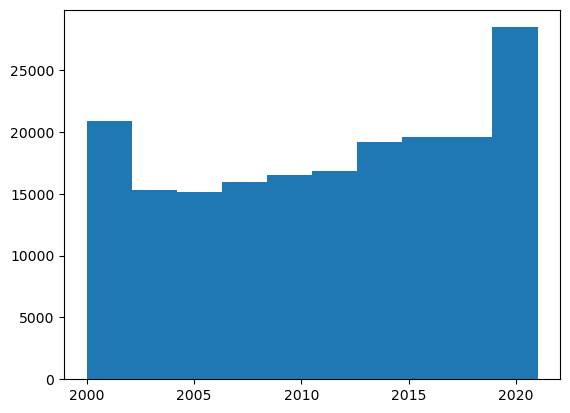

In [148]:
import matplotlib.pyplot as plt

plt.hist(new_df["year"])

# To do:
# Artist Genre and Langauge of Artist to be added.